# Spain Weather Data Analysis
https://data.world/chucheria/spain-weather-data-from-1920

In [1]:
import glob
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option("display.max_rows", 15)
%matplotlib inline

all_files = glob.glob("./*.csv")
data = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
# data = pd.read_csv("2005-2009_weather-data-spain.csv")

### Missing Data

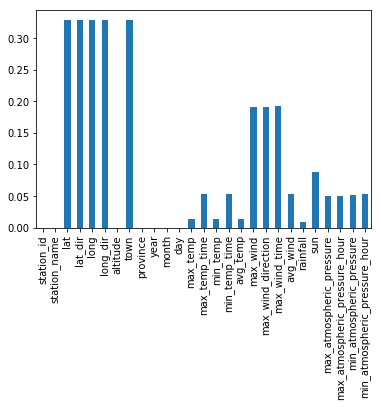

In [2]:
(np.sum(data.isna())/len(data)).plot('bar')

### Number of time series for each station, 1965-2012
Below we can see that we have a grid of 100 weather stations scattered across Spain

In [3]:
data.groupby('station_id').count()

,station_name,lat,lat_dir,long,long_dir,altitude,town,province,year,month,...,max_wind,max_wind_direction,max_wind_time,avg_wind,rainfall,sun,max_atmospheric_pressure,max_atmospheric_pressure_hour,min_atmospheric_pressure,min_atmospheric_pressure_hour
station_id,,,,,,,,,,,,,,,,,,,,,
0016A,17199,17199,17199,17199,17199,17199,17199,17199,17199,17199,...,12212,12213,12125,16948,17140,16755,16991,16983,16851,16846
0200E,17197,0,0,0,0,17197,0,17197,17197,17197,...,10900,10900,10529,10503,15704,12308,10607,10607,10464,10463
0370B,2769,0,0,0,0,2769,0,2769,2769,2769,...,0,0,0,0,2739,0,30,30,30,30
1014,17226,0,0,0,0,17226,0,17226,17226,17226,...,15766,15769,15748,17192,17226,17216,16718,16718,16727,16727
1024E,17226,0,0,0,0,17226,0,17226,17226,17226,...,17097,17097,17092,17188,17226,17047,17212,17212,17212,17210
1082,17154,17154,17154,17154,17154,17154,17154,17154,17154,17154,...,17133,17133,17131,17144,17153,16818,17138,17138,17138,17137
1109,16473,16473,16473,16473,16473,16473,16473,16473,16473,16473,...,11649,11649,11640,16275,16473,13434,16416,16405,16121,16108
1110,11785,0,0,0,0,11785,0,11785,11785,11785,...,11668,11669,11660,11781,11724,11779,11784,11775,11784,11778
1111,5441,0,0,0,0,5441,0,5441,5441,5441,...,5431,5431,5428,5431,5440,5437,5434,5434,5434,5432


### Remove duplicates and get cohesive time steps for the weather stations

In [ ]:
missing_rows = data[data['avg_temp'].isna() | data['rainfall'].isna()]
missing_time_steps = missing_rows[['year','month','day']].drop_duplicates()
print(len(data))
print(len(missing_time_steps))
i=0
for index, row in missing_time_steps.iterrows():
    i+=1
    indexNames = data[(data['year'] == row['year']) & (data['month'] == row['month']) & (data['day'] == row['day'])].index
    data.drop(indexNames , inplace=True)
    if i%100==0:
        print("{}/{}".format(i, len(missing_time_steps)))

print(len(data))


1511573
11234
100/11234
200/11234
300/11234
400/11234
500/11234
600/11234
700/11234
800/11234
900/11234
1000/11234
1100/11234
1200/11234
1300/11234
1400/11234
1500/11234
1600/11234


In [ ]:
# print(data)
